# Project Overview

The aim of this projects is to introduce you to data visualization with Python as concrete and as consistens as possible. Using what you have learned; download the London Crime Dataset from Kaggle. This dataset is a record of crime in mojor metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and mojor/minor category from Jan 2008-Dec 2016.

This dataset contains:

<ol>
    <li>lsoa_code: this represents a policing area</li>
    <li>borough: the lonodn borough for which the statistic is related</li>
    <li>major_category: the moajor crime category</li>
    <li>minor_category: the minor crime category</li>
    <li>value: the count of the crime for that particular borough, in that particular month</li>
    <li>year: the year of the summary statistic</li>
    <li>month: the month of the summary statistic</li>
</ol>

Formulate a question and derive a statistical hypothesis test to answer the question. Yout have to demonstrate that you are able to make decisions using data in a scientific manner. And the important things, Visualized the data. Examples of questions can be:

<ol>
    <li>What is the change in the number of crime incidents from 2011 to 2016?</li>
    <li>what were the top 3 crimes per borough in 2016?</li>
</ol>

# Import Library

In [1]:
# Untuk pemrosesan data
import pandas as pd
import numpy as np

# Untuk tujuan plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Untuk membuat word cloud
from wordcloud import WordCloud

# Dataset Description

Dataset yang digunakan adalah data kejahatan di wilayah metropolitan utama, seperti kota London yang terjadi dalam pola yang berbeda. Data ini mencakup jumlah laporan kriminal menurut bulan, wilayah LSOA, serta kategori Mayor dan Minor dari Januari 2008 sampai Desember 2016. Data ini terdiri dari 13.490.604 baris data dengan 7 kolom yang berisi:

<ol>
    <li>lsoa_code = kode area polisi</li>
    <li>borough = wilayah kota London yang terkait dengan data statistik</li>
    <li>major_category = kategori kejahatan mayor</li>
    <li>minor_category = kategori kejahatan minor</li>
    <li>value = jumlah kejahatan yang terjadi di wilayah (borough) tertentu pada bulan tertentu</li>
    <li>year = ringkasan tahun kejadian</li>
    <li>month = ringkasan bulan kejadian</li>
</ol>

In [2]:
# Membaca dataset
df = pd.read_csv('./london_crime_by_lsoa.csv')

# Menampilkan dataset
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


# Calculate Rows and Columns

In [3]:
# Mengimpor isi file.csv ke dalam variabel df_london_crime
df_london_crime = pd.read_csv('./london_crime_by_lsoa.csv')

# Menghitung jumlah baris dan kolom
rows, columns = df_london_crime.shape

# Menampilkan jumlah baris
print(rows, "Rows")

# Menampilkan jumlah kolom
print(columns, "Columns")

13490604 Rows
7 Columns


# Information Dataset

In [4]:
# Melihat informasi tentang dataset
df_london_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


# Check for Missing Values in Dataset

In [5]:
# Mengetahui missing values dalam kolom yang disediakan oleh dataset.
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Dikarenakan tidak terdapat missing values maka dataset dapat langsung digunakan.

# Data Preprocessing

In [6]:
# Menampilkan 10 data teratas
df_london_crime.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


# Setting Global Variables

In [7]:
# Daftar tahun
years = list(map(int,np.sort(df_london_crime['year'].unique())))

# Daftar wilayah
boroughs = list(df_london_crime['borough'].unique())

# Daftar kategori utama
major_categories = list(df_london_crime['major_category'].unique())

# Daftar kategori minor
minor_categories = list(df_london_crime['minor_category'].unique())

# Create Major Crime Data Frame in the Year (2008 - 2016)

In [8]:
data_major = {}
for year in years:
    # Mengambil data pada dataset london_crime berdasarkan variable global years
    # Melakukan pengelompokan berdasarkan major_categories dan melakukan sum pada column values
    major_years = df_london_crime[
        df_london_crime['year'] == year
    ].groupby('major_category')['value'].sum()
    
    # Series untuk pembuatan dataframe
    data_major[year] = pd.Series(
        data=map(int, major_years.reset_index()['value'].values),
        index=major_years.index
    )

# Membuat dataframe dengan 'Major Categories' sebagai index dan 'Years' sebagai columns
df_major_years = pd.DataFrame(
    columns=years,
    index=major_categories,
    data=data_major
)
df_major_years['value'] = df_major_years[years].sum(axis=1)

# Shorting kolom value secara Ascending
df_major_years.sort_values(by='value', ascending=False, inplace=True)

# Tampilkan 5 data keatas
df_major_years.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,value
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765


# Create Minor Crime Data Frame in the Year (2008 - 2016)

In [9]:
data_minor = {}
for year in years:
    # Mengambil data pada dataset london_crime berdasarkan variable global years 
    # Melakukan pengelompokan berdasarkan major_categories dan melakukan sum pada column values
    minor_years = df_london_crime[
        df_london_crime['year'] == year
    ].groupby('minor_category')['value'].sum()
    
    # Series untuk pembuatan dataframe
    data_minor[year] = pd.Series(
        data=map(int, minor_years.reset_index()['value'].values),
        index=minor_years.index
    )

# Membuat dataframe dengan 'Major Categories' sebagai index dan 'Years' sebagai columns
df_minor_years = pd.DataFrame(
    columns=years,
    index=minor_categories,
    data=data_minor
)
df_minor_years['value'] = df_minor_years[years].sum(axis=1)

# Shorting kolom value secara Ascending
df_minor_years.sort_values(by='value', ascending=False, inplace=True)

# Tampilkan 5 data keatas
df_minor_years.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,value
Other Theft,99280,95424,103997,113616,132056,115757,108577,107571,103807,980085
Theft From Motor Vehicle,76570,68856,69709,69604,68198,63509,52167,50024,51319,569956
Burglary in a Dwelling,56655,60185,57123,62439,61716,56537,48975,44656,42996,491282
Harassment,43389,43594,42808,37493,43396,41805,55330,71633,78676,458124
Assault with Injury,56586,55297,54173,50768,50369,39929,45677,48164,50038,451001


# Data Frame Total Major Crime Cases for Each Region in the Year (2008 - 2016)

In [10]:
data_borough_major = {}
for major_categorie in major_categories:
    # Mengambil data pada dataset london_crime berdasarkan variable global year
    # Melakukan pengelompokan berdasarkan boroughs dan melakukan sum pada column values
    borough_major = df_london_crime[df_london_crime['major_category'] == major_categorie].groupby('borough')['value'].sum()
    
    # Series untuk pembuatan dataframe
    data_borough_major[major_categorie] = pd.Series(
        data=map(int, borough_major.reset_index()['value'].values),
        index=borough_major.index
    )

# Membuat dataframe dengan 'Boroughs' sebagai index dan 'years' sebagai columns
df_boroughs_major = pd.DataFrame(
    columns=major_categories,
    index=boroughs,
    data=data_borough_major
)
df_boroughs_major['value'] = df_boroughs_major[major_categories].sum(axis=1)

# Shorting kolom value secara Ascending
df_boroughs_major.sort_values(by='value', ascending=False, inplace=True)

# Tampilkan 5 data keatas
df_boroughs_major.head()

,Burglary,Violence Against the Person,Robbery,Theft and Handling,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Sexual Offences,value
Westminster,29295,71448,15752,277617,20405,34031,273.0,6148,59.0,455028.0
Lambeth,30199,72726,18408,114899,26136,25083,137.0,4520,70.0,292178.0
Southwark,27980,68356,16153,109432,24450,27381,321.0,4696,40.0,278809.0
Camden,27939,53012,9286,140596,18482,21816,123.0,3857,36.0,275147.0
Newham,25356,66221,16913,106146,24177,18389,323.0,4456,43.0,262024.0


# Data Frame Total Minor Crime Cases for Each Region in the Year (2008 - 2016)

In [11]:
data_borough_minor = {}
for minor_categorie in minor_categories:
    # Mengambil data pada dataset london_crime berdasarkan variable global year
    # Melakukan pengelompokan berdasarkan boroughs dan melakukan sum pada column values
    borough_minor = df_london_crime[df_london_crime['minor_category'] == minor_categorie].groupby('borough')['value'].sum()
    
    # Series untuk pembuatan dataframe
    data_borough_minor[minor_categorie] = pd.Series(
        data=map(int, borough_minor.reset_index()['value'].values),
        index=borough_minor.index
    )

# Membuat dataframe dengan 'Boroughs' sebagai index dan 'years' sebagai columns
df_boroughs_minor = pd.DataFrame(
    columns=minor_categories,
    index=boroughs,
    data=data_borough_minor
)
df_boroughs_minor['value'] = df_boroughs_minor[minor_categories].sum(axis=1)

# Shorting kolom value secara Ascending
df_boroughs_minor.sort_values(by='value', ascending=False, inplace=True)

# Tampilkan 5 data keatas
df_boroughs_minor.head()

,Burglary in Other Buildings,Other violence,Personal Property,Other Theft,Offensive Weapon,Criminal Damage To Other Building,Theft/Taking of Pedal Cycle,Motor Vehicle Interference & Tampering,Theft/Taking Of Motor Vehicle,Wounding/GBH,...,Assault with Injury,Drug Trafficking,Other Drugs,Business Property,Other Notifiable,Other Sexual,Theft From Motor Vehicle,Rape,Murder,value
Westminster,17184,3135,15050,142032,1818,3990,12731,1501.0,6108,6145,...,20219,1657,268.0,702,5741,54.0,21735,5.0,28.0,455028.0
Lambeth,8815,3841,16951,44006,2532,2896,9771,1882.0,8475,7090,...,21103,1874,263.0,1457,4213,57.0,20019,13.0,53.0,292178.0
Southwark,11742,3380,14939,42879,2061,2852,10916,2176.0,8836,6206,...,19793,2047,180.0,1214,4483,30.0,18103,10.0,52.0,278809.0
Camden,13257,1922,8617,64265,1112,2989,11347,1923.0,6412,4078,...,14516,1557,219.0,669,3653,31.0,18292,5.0,24.0,275147.0
Newham,8566,3178,15779,33289,1852,2145,4100,2662.0,10531,6358,...,19452,1155,81.0,1134,4271,27.0,28771,16.0,56.0,262024.0


# Area Plot

Apa lima kejahatan major_category teratas yang terjadi dalam kurun waktu 2008-2016?

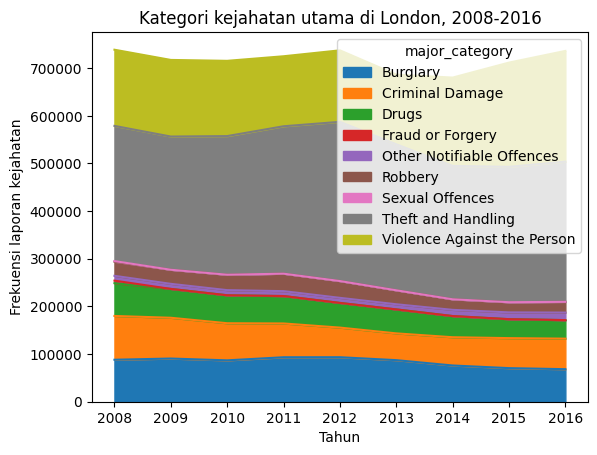

In [12]:
# Melakukan pengelompokan dan menghitung total laporan kejahatan
df_grouped = df.groupby(['major_category', 'year']).agg({'value': 'sum'}).reset_index()

# Melakukan pivot untuk memudahkan visualisasi data
df_pivoted = df_grouped.pivot(index='year', columns='major_category', values='value')

# Membuat visualisasi area
ax = df_pivoted.plot(kind='area')

# Menambahkan judul visualisasi, label sumbu-x, dan label sumbu-y
ax.set_title('Kategori kejahatan utama di London, 2008-2016')
ax.set_xlabel('Tahun')
ax.set_ylabel('Frekuensi laporan kejahatan')

# Menampilkan visualisasi
plt.show()

# Analysis

Dari visualisasi di atas, lima kategori kejahatan utama teratas yang terjadi selama periode 2008-2016:

<ol>
    <li>Violence Against the Person</li>
    <li>Theft and Handling</li>
    <li>Sexual Offences</li>
    <li>Robbery</li>
    <li>Other Notifiable Offences</li>
<ol>

# Line Plot

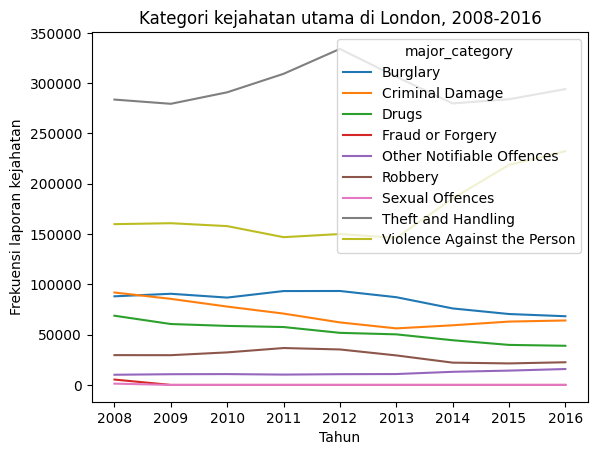

In [13]:
# Melakukan pengelompokan dan menghitung total laporan kejahatan berdasarkan major_category
df_grouped = df.groupby(['major_category', 'year']).agg({'value': 'sum'}).reset_index()

# Melakukan pivot untuk memudahkan visualisasi data
df_pivoted = df_grouped.pivot(index='year', columns='major_category', values='value')

# Membuat visualisasi area
ax = df_pivoted.plot(kind='line')

# Menambahkan judul visualisasi, label sumbu-x, dan label sumbu-y
ax.set_title('Kategori kejahatan utama di London, 2008-2016')
ax.set_xlabel('Tahun')
ax.set_ylabel('Frekuensi laporan kejahatan')

# Menampilkan visualisasi
plt.show()

# Analysis

Dari visualisasi di atas, lima kategori kejahatan utama teratas yang terjadi selama periode 2008-2016:

<ol>
    <li>Violence Against the Person</li>
    <li>Theft and Handling</li>
    <li>Sexual Offences</li>
    <li>Robbery</li>
    <li>Other Notifiable Offences</li>
<ol>

# Histogram

Bagaimana frekuensi kejahatan major_category yang muncul tiap bulan dari tahun 2008 sampai 2016?

<Figure size 1000x600 with 0 Axes>

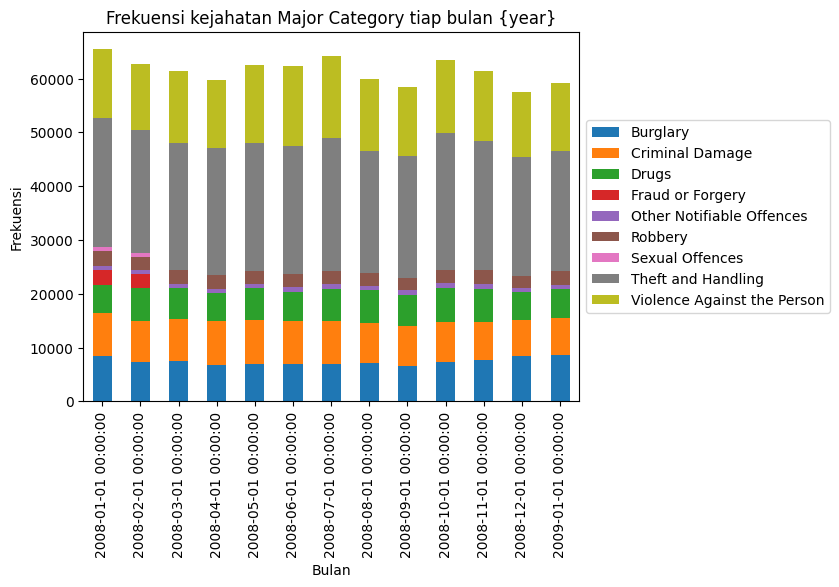

<Figure size 1000x600 with 0 Axes>

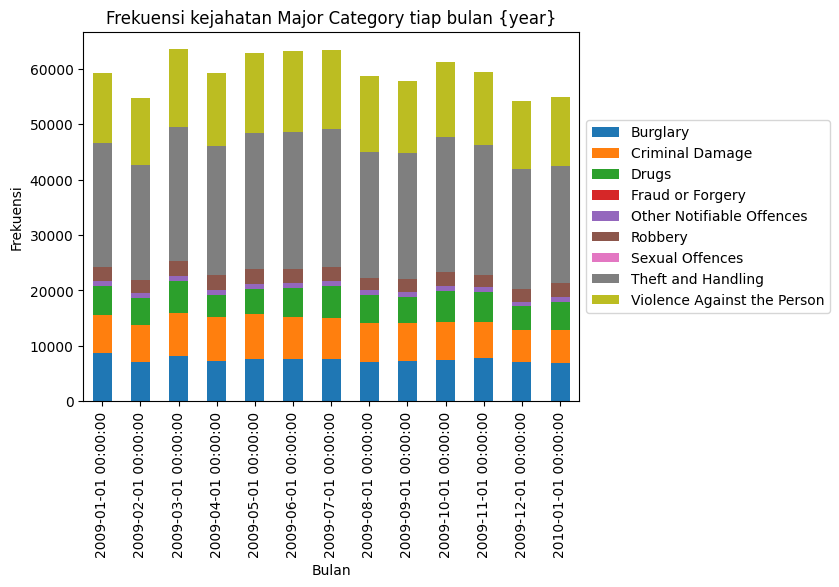

<Figure size 1000x600 with 0 Axes>

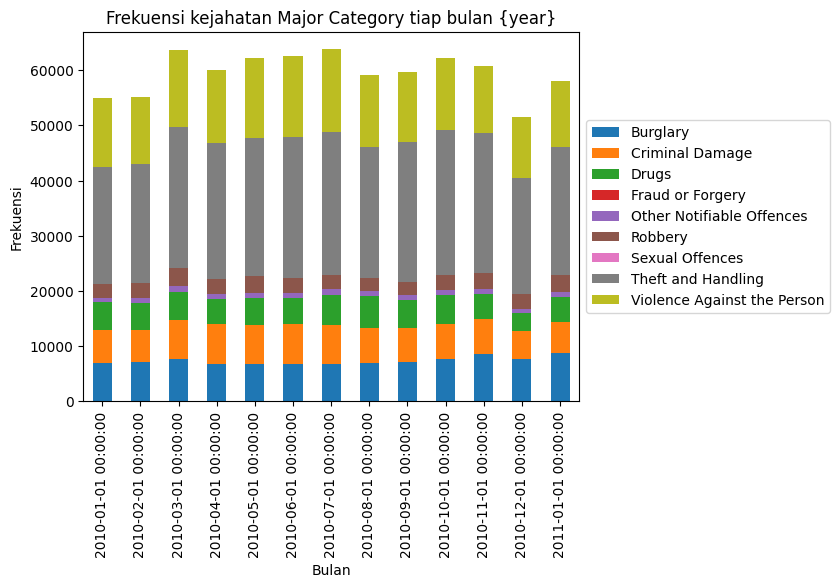

<Figure size 1000x600 with 0 Axes>

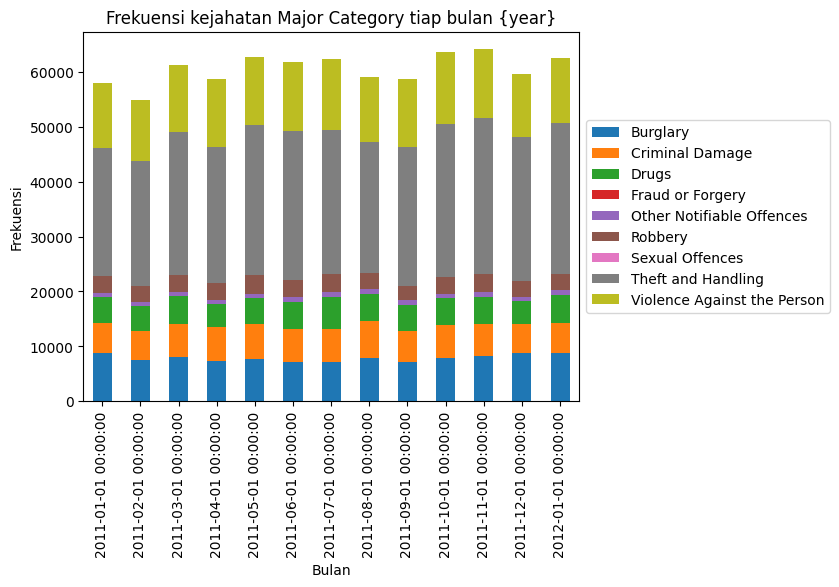

<Figure size 1000x600 with 0 Axes>

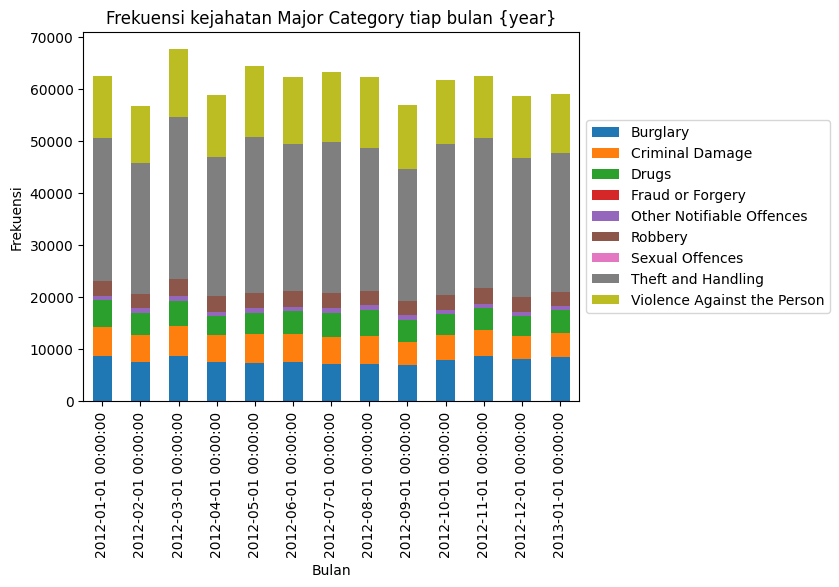

<Figure size 1000x600 with 0 Axes>

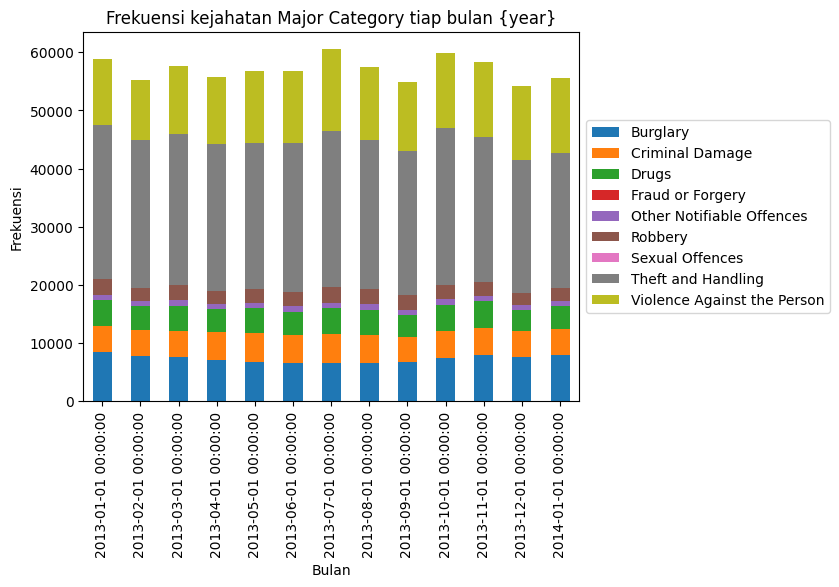

<Figure size 1000x600 with 0 Axes>

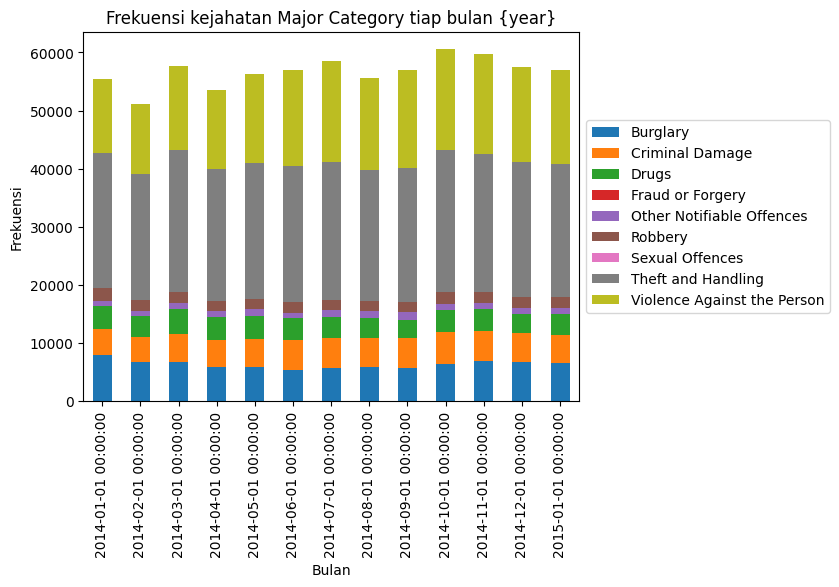

<Figure size 1000x600 with 0 Axes>

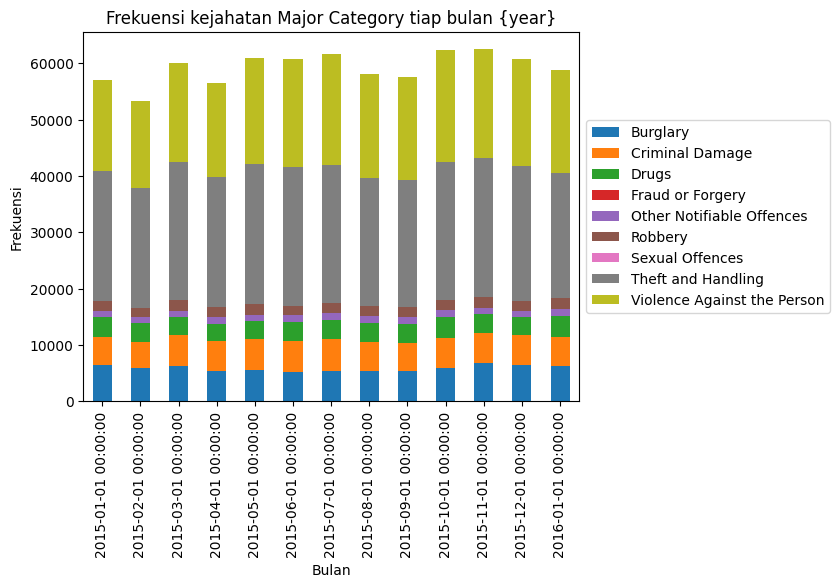

<Figure size 1000x600 with 0 Axes>

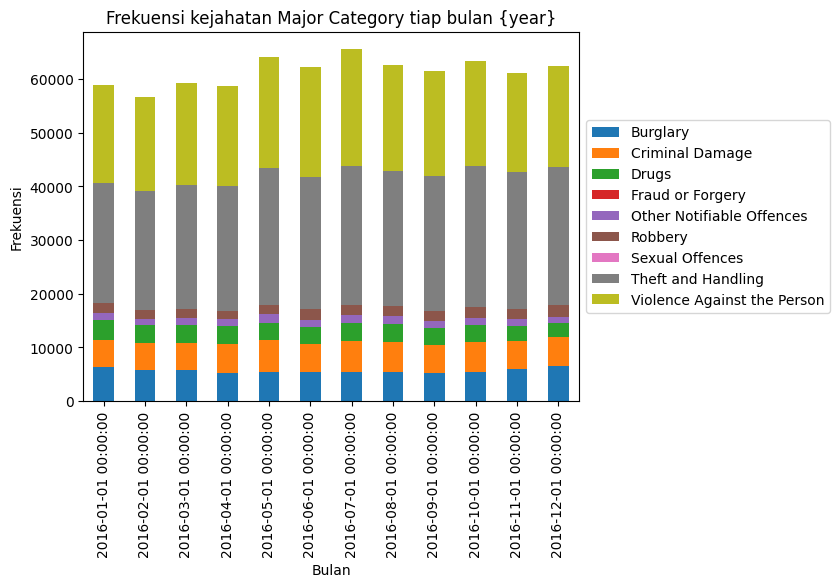

In [14]:
# Mengonversi kolom 'tahun' dan 'bulan' menjadi kolom datetime 'tahun_bulan'
df['year_month'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str), format='%Y-%m')

# Melakukan pengelompokan dan menghitung total laporan kejahatan
grouped_data = df.groupby(['year_month', 'major_category']).sum()

# Pivot data untuk mempermudah visualisasi data
wide_data = grouped_data['value'].unstack()

# Membuat visualisasi bar bertumpuk untuk setiap tahun
for year in range(2008, 2017):
    plt.figure(figsize=(10,6))
    start_date = pd.Timestamp(str(year))
    end_date = pd.Timestamp(str(year+1))
    data = wide_data.loc[start_date:end_date, :]
    data.plot(kind='bar', stacked=True)
    plt.title("Frekuensi kejahatan Major Category tiap bulan {year}")
    plt.xlabel('Bulan')
    plt.ylabel('Frekuensi')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# Analysis

Dari hasil visualisasi di atas, frekuensi kejahatan major_category yang muncul tiap bulan dalam tiap tahun sedikit demi sedikit mengalami penurunan yang berkelanjutan kecuali untuk kejahatan major_kategory violence Against the Person yang mengalami pasang surut degan kenaikkan di tahun 2012 kemudian turun lalu naik kembali di tahun 2014 secara konstan ke tahun berikutnya dan juga kejahatan major_kategory Theft and Handling yang naik di tahun yang sama 2012 walaupun pada tahun berikutnya dia mengalami penurunan yang konstan

# Bar Chart

Lima kejahatan minor tertinggi apakah yang ada di kota London dalam kurun waktu 2008-2016?

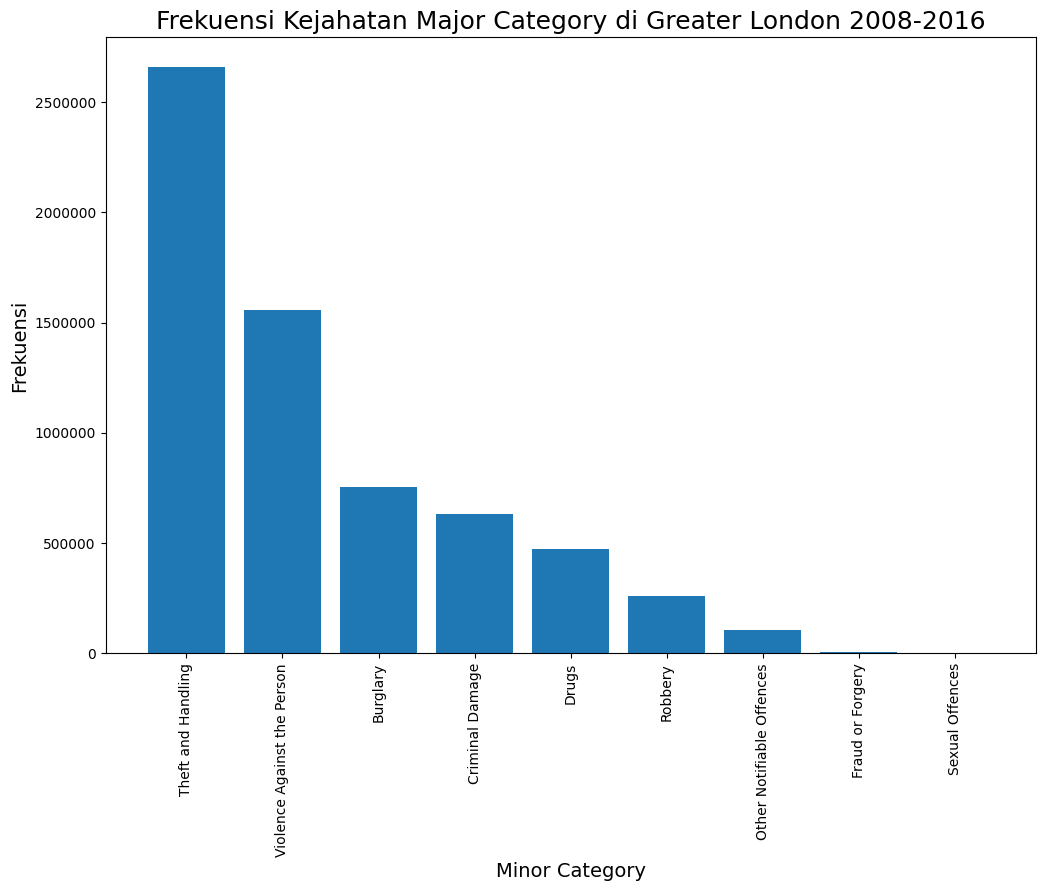

In [15]:
# Mengelompokkan data berdasarkan minor_category dan menjumlahkan nilai kolom 'value'
grouped_data = df_london_crime.groupby('major_category')['value'].sum()
grouped_data = grouped_data.sort_values(ascending=False)

# Membuat visualisasi bar
plt.figure(figsize=(12,8))
plt.bar(grouped_data.index, grouped_data.values)
plt.title('Frekuensi Kejahatan Major Category di Greater London 2008-2016', fontsize=18)
plt.ticklabel_format(axis='y', scilimits=(0,101))
plt.xlabel('Minor Category', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.xticks(rotation=90)
plt.show()

# Analysis

Frekuensi kejahatan 'Theft and Handling' menjadi yang tertinggi dengan lebih dari 2.500.000 kasus, disusul 'Violence Against the Person' menjadi peringkat kedua lebih dari 1.500.000. 'Burglary' dengan lebih dari 500.000 kasus. 'Criminal Damage' dengan lebih dari 500.000 kasus. 'Drugs' dengan lebih dari hampir 500.000 kasus.

# Pie Chart

Bagaimana persentase kejahatan minor yang terjadi dari tahun 2008 - 2016?

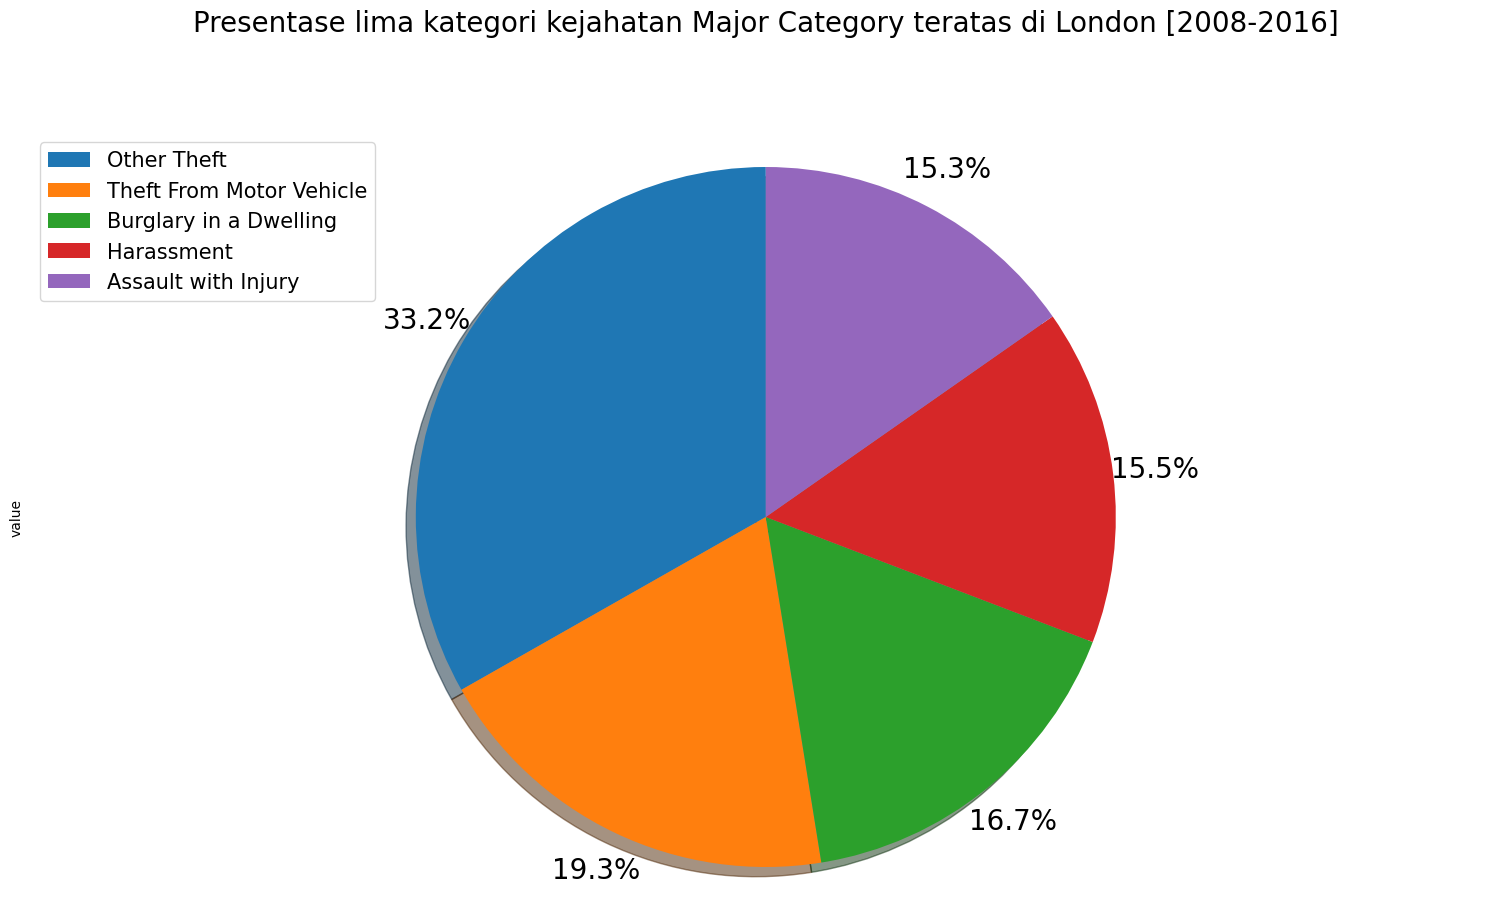

In [24]:
# Mengelompokkan data berdasarkan 'minor_category' dan menjumlahkan kolom 'value'
minor_cat = df.groupby('minor_category')['value'].sum()

# Mengambil lima data teratas 'minor_category' dari yang terbesar
minor_cat = minor_cat.sort_values(ascending=False)[:5]

# Membuat visualisasi diagram pie chart
minor_cat.plot(kind='pie',
                    figsize = (19,10),
                    autopct= '%1.1f%%',
                    startangle=90,
                    shadow=True,
                    labels=None,
                    pctdistance= 1.12,
                    fontsize= 20,
                    )
plt.title("Presentase lima kategori kejahatan Major Category teratas di London [2008-2016]", y=1.12, fontsize=20)
plt.axis('equal')
plt.legend(labels=minor_cat.index, loc='upper left', fontsize=15)
plt.show()

Dari visualisasi diatas, dapat dilihat bahwa persentase jumlah kejahatan minor_category tertinggi adalah Other Theft dengan persentase 33.2%, Theft From Motor Vehicle dengan persentase 19.3%, Burglary in a Dwelling 16.7%, Harassement 15.5% dan Assault with Injury 15.3%

# Box Plot

Bagaimana visualisasi distribusi dengan kasus 'Major Crime' disetiap wilayah tiap tahunnya?

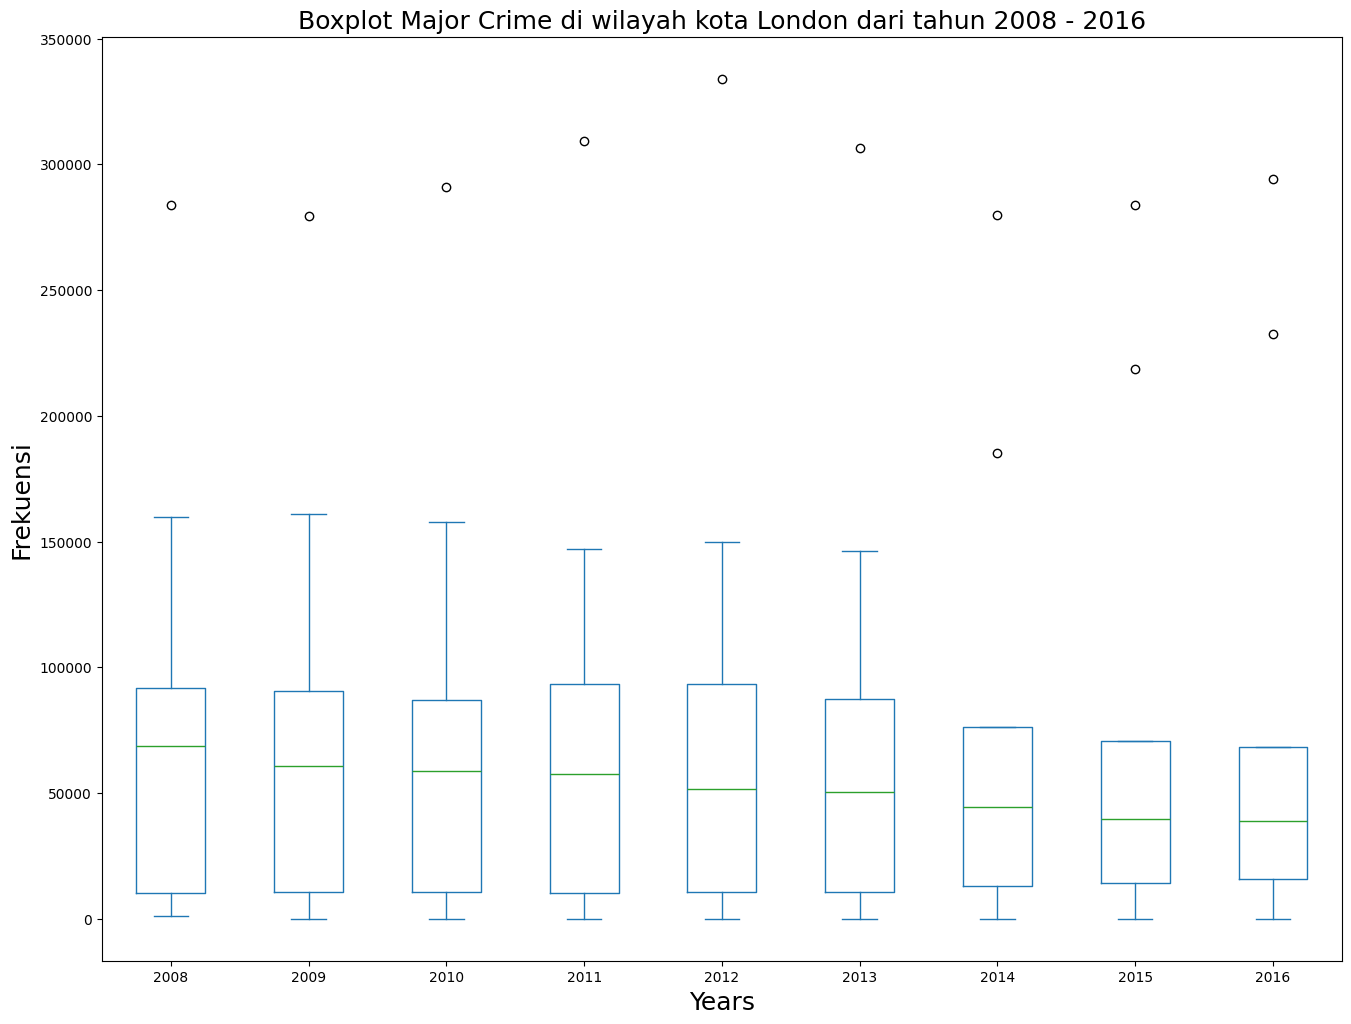

In [17]:
df_major_years[years].plot(
    kind='box',
    figsize=(16,12),
)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Frekuensi', fontsize=18)
plt.title('Boxplot Major Crime di wilayah kota London dari tahun 2008 - 2016',  fontsize=18)
plt.show()

# Analysis

Grafik di atas menampilkan visualisasi boxplot yang sudah dibuat dimana pada setiap tahunnya rata-rata total kasus kejahatan yang terjadi untuk setiap wilayah berada dalam kisaran sekitar 50.000 - 80.000 kasus dan range total kasus kejahatan yang terjadi setiap tahunnya memiliki range yang mirip, kecuali 2014 - 2016. Range total kasus kejahatan pada tahun 2014 - 2016 lebih tersebar dibandingkan tahun-tahun lainnya.

# Scatter Plot

Bagaimana visualisasi frequensi kejahatan major terbesar di wilayah London pada tahun 2008 - 2016?

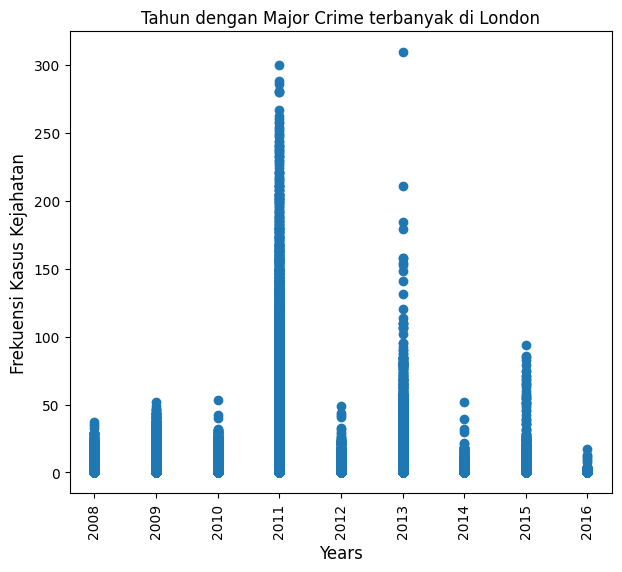

In [18]:
plt.figure(figsize=(7,6))
plt.scatter(df_london_crime['major_category'], df_london_crime['value'])
plt.xticks(range(len(years)), years)
plt.ylabel('Frekuensi Kasus Kejahatan', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.xticks(rotation=90)
plt.ticklabel_format(axis='y', scilimits=(0,101))
plt.title('Tahun dengan Major Crime terbanyak di London', fontsize=12)
plt.show()

# Analysis

Dari hasil visualisasi di atas menunjukkan bahwa tren penurunan terjadi peningkatan yang sangat signifikan pada tahun 2011 dan terjadi penurunan pada tahun 2012 dan mengalami pelonjakkan tertinggi pada tahun 2013

# Word Clouds

Bagaimana membuat frekuensi laporan kejahatan major_category dalam data tersebut?

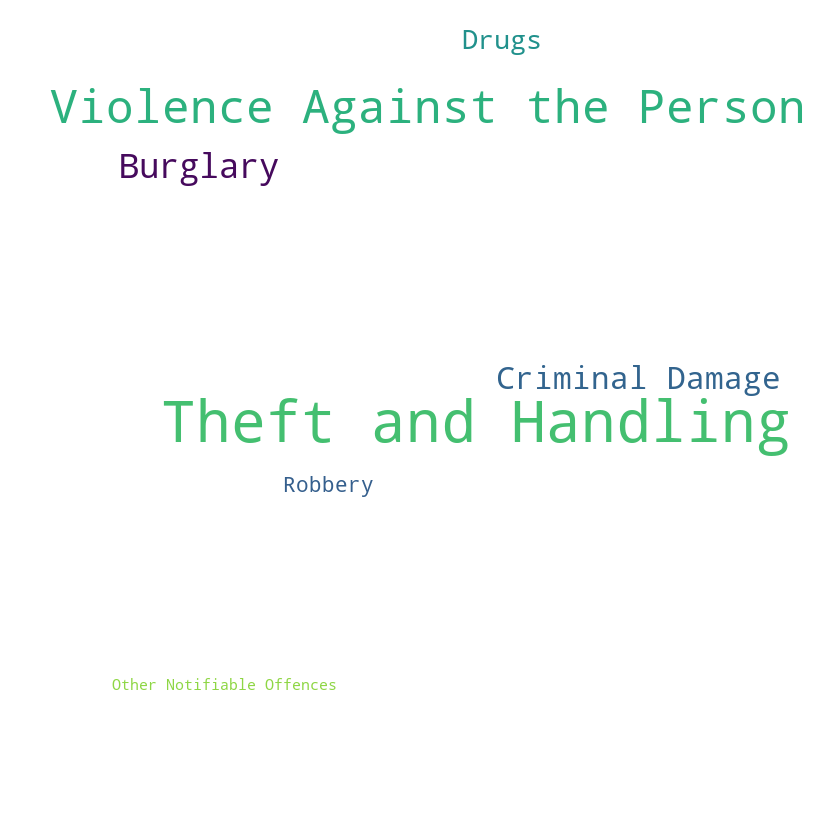

In [19]:
# Mengelompokkan data berdasarkan major_category dan menghitung frekuensinya
major_category_count = df.groupby('major_category')['value'].sum()

# Mengonversi data menjadi dictionary
major_category_dict = major_category_count.to_dict()

# Membuat word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(major_category_dict)

# Menampilkan word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Analysis

Hasil dari visualisasi di atas menunjukkan bahwa Theft and Handling tercetak denga fontsize yang lebih besar dari yang lain sehingga dapat disimpulkan bahwa kejahatan tersebut merupakan kejahatan yang banyak terjadi di kota London

# Overall Anasysis

<ol>
    <li>Theft and Handling menjadi kasus kejahatan major_category terbanyak berdasarkan visualisasi word clouds dan untuk kejahatan minor_category, Other Theft menjadi kasus terbanyaknya berdasarkan visualisasi pie chart.</li>
    <li>Violence Againts the Person pada major_category memiliki frekuensi tertinggi pada pelaporan kejahatan berdasarkan data area plot dan Other Theft pada minor_category memiliki frekuensi tertinggi pada pelaporan kejahatan berdasarkan data bar chart.</li>
    <li>Frekuensi kejahatan 'Theft and Handling' menjadi yang tertinggi dengan lebih dari 2.500.000 kasus, disusul 'Violence Against the Person' menjadi peringkat kedua lebih dari 1.500.000. 'Burglary' dengan lebih dari 500.000 kasus. 'Criminal Damage' dengan lebih dari 500.000 kasus. 'Drugs' dengan lebih dari hampir 500.000 kasus.</li>
    <li>Frekuensi kejahatan major_category yang muncul tiap bulan dalam tiap tahun sedikit demi sedikit mengalami penurunan yang berkelanjutan kecuali untuk kejahatan major_kategory Violence Against the Person yang mengalami pasang surut degan kenaikkan di tahun 2012 kemudian turun lalu naik kembali di tahun 2014 secara konstan ke tahun berikutnya dan juga kejahatan major_kategory Theft and Handling yang naik di tahun yang sama 2012 walaupun pada tahun berikutnya dia mengalami penurunan yang konstan.</li>
    <li>Hasil visualisasi box plot memperlihatkan bahwa setiap tahunnya rata-rata total kasus kejahatan yang terjadi untuk setiap wilayah berada dalam kisaran sekitar 50.000 - 80.000 kasus dan range total kasus kejahatan yang terjadi setiap tahunnya memiliki range yang mirip, kecuali 2014 - 2016. Range total kasus kejahatan pada tahun 2014 - 2016 lebih tersebar dibandingkan tahun-tahun sebelumnya.</li>
</ol>